In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

1.9.0


## 保留训练数据中出现频次在前 10000 位的字词

imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [ ]:
print(train_data[0])

## 标签0表示负面影评，1表示正面影评。

len(train_data[0]), len(train_data[1])

## 字符串映射到整数

In [ ]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
# 翻转key和value
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
# 将训练数据转化为文字
decode_review(train_data[0])

## 使用填充数组，使它们都具有相同的长度，创建一个形状为 max_length * num_reviews 的整数张量

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [11]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [12]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [9]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## 使用 binary_crossentropy 损失函数 

In [21]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 数据集分离成训练集，验证集

In [22]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 模型训练 

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 181us/step - loss: 0.6950 - acc: 0.5024 - val_loss: 0.6925 - val_acc: 0.4953
Epoch 2/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.6905 - acc: 0.5688 - val_loss: 0.6896 - val_acc: 0.5935
Epoch 3/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.6882 - acc: 0.6070 - val_loss: 0.6876 - val_acc: 0.5740
Epoch 4/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.6853 - acc: 0.6561 - val_loss: 0.6847 - val_acc: 0.5535
Epoch 5/40
15000/15000 [==============================] - 0s 33us/step - loss: 0.6811 - acc: 0.6521 - val_loss: 0.6794 - val_acc: 0.7428
Epoch 6/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.6750 - acc: 0.7429 - val_loss: 0.6727 - val_acc: 0.7449
Epoch 7/40
15000/15000 [==============================] - 0s 32us/step - loss: 0.6659 - acc: 0.7497 - val_loss: 0.6632 - val_ac

## 模型测试 

In [18]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 24us/step
[0.3042789040660858, 0.87532]


In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## 画训练准确率与验证准确率图 

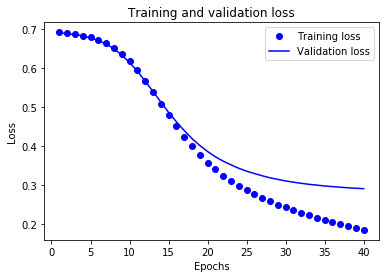

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

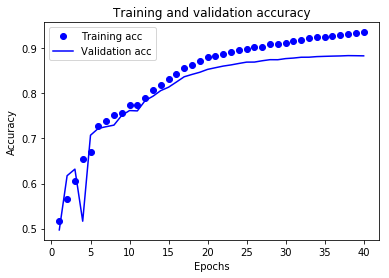

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()